# **Handling Missing Values**

Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Learning Machine Learning/data_science_job.csv')

In [39]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


Check for percentage of missing columns

In [41]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


Select columns (Missing values% < 5%)

In [42]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [43]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9479,0.920,no_enrollment,NaN,8.0,12.0
15813,0.698,no_enrollment,High School,11.0,23.0
5911,0.923,no_enrollment,Graduate,15.0,226.0
7538,0.890,no_enrollment,Graduate,10.0,78.0
504,0.926,no_enrollment,Graduate,7.0,120.0


Leftover data %

In [44]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

Make dataframe of selected columns

In [45]:
new_df = df[cols].dropna()

In [46]:
df.shape , new_df.shape

((19158, 13), (17182, 5))

Plot Histogram (Before Applying CCA: Numerical Data)

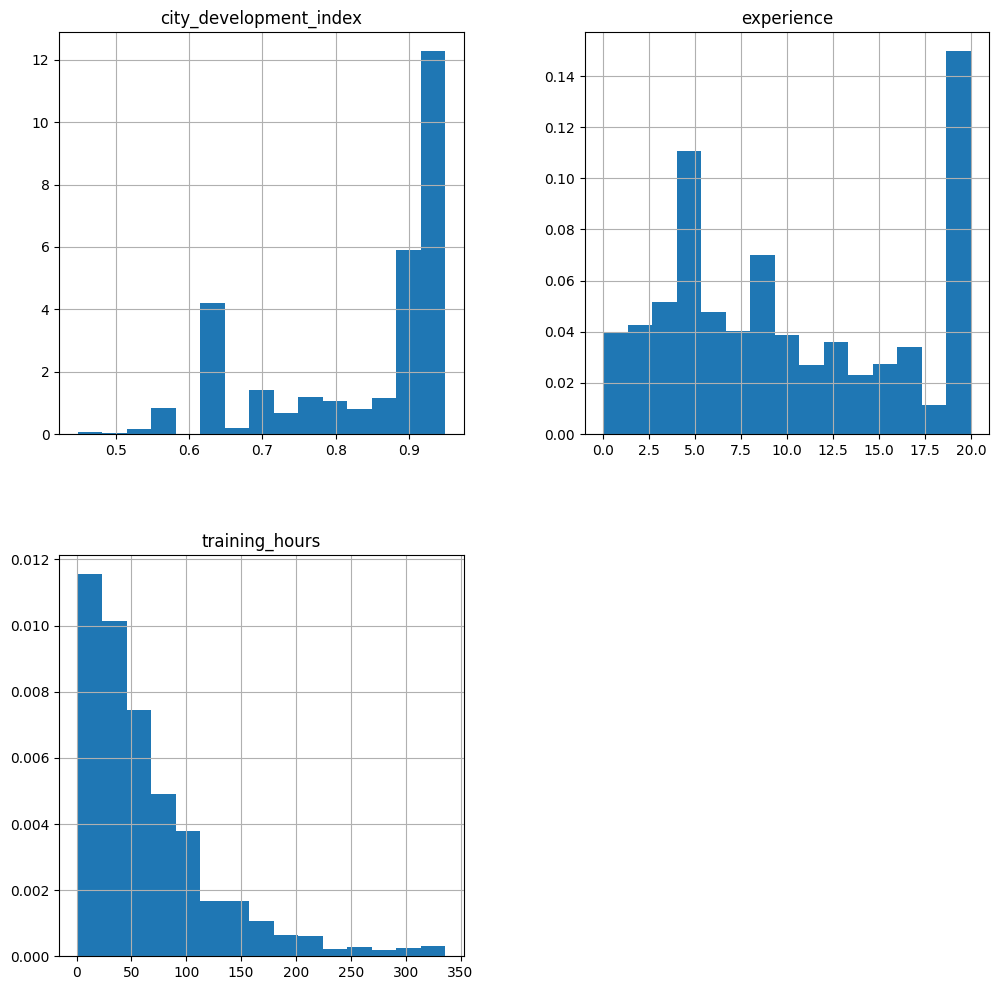

In [47]:
new_df.hist(bins = 15, density = True, figsize = (12,12))
plt.show()

Plot Histogram: Training Hours

<Axes: >

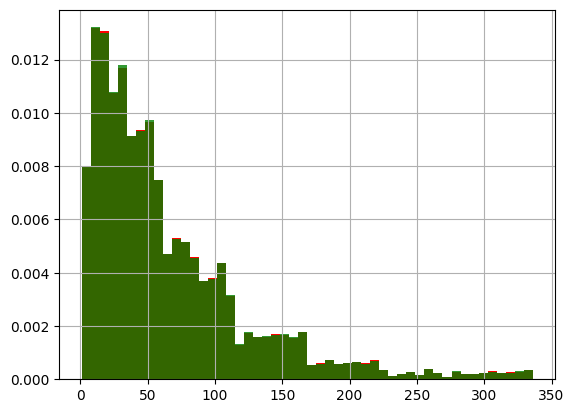

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].hist(bins = 50, ax = ax, density = True, color = 'red')
new_df['training_hours'].hist(bins = 50, ax = ax, density = True, color = 'green', alpha = 0.8)

Plot Probability Density Function (PDF): Training Hours

<Axes: ylabel='Density'>

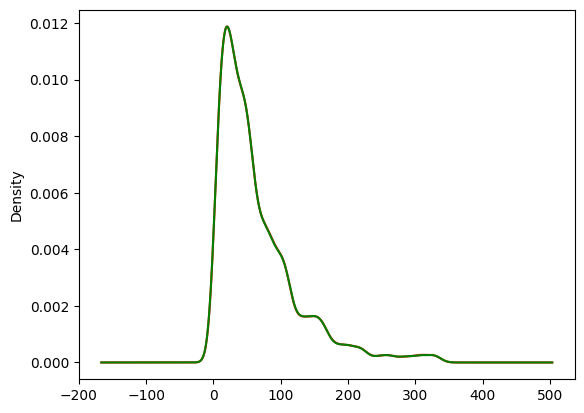

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].plot.density(color = 'red')
new_df['training_hours'].plot.density(color = 'green')

Plot Histogram: City Development

<Axes: >

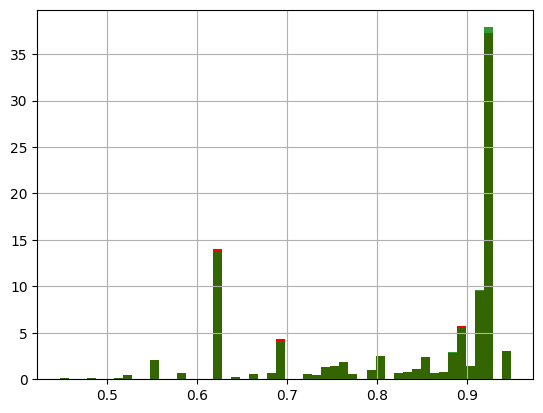

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].hist(bins = 50, ax = ax, density = True, color = 'red')
new_df['city_development_index'].hist(bins = 50, ax = ax, density = True, color = 'green', alpha = 0.8)

Plot PDF: City Development

<Axes: ylabel='Density'>

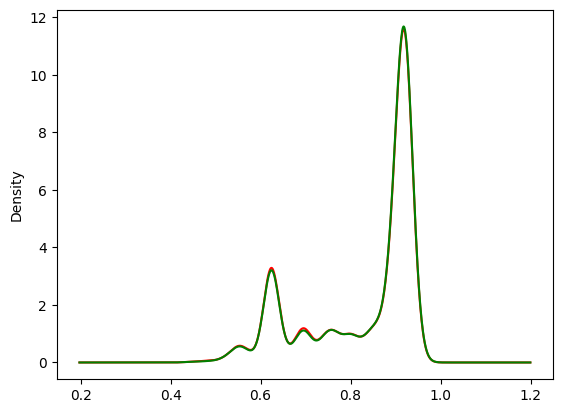

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].plot.density(color='red')

new_df['city_development_index'].plot.density(color='green')

Plot Histogram: Experience

<Axes: >

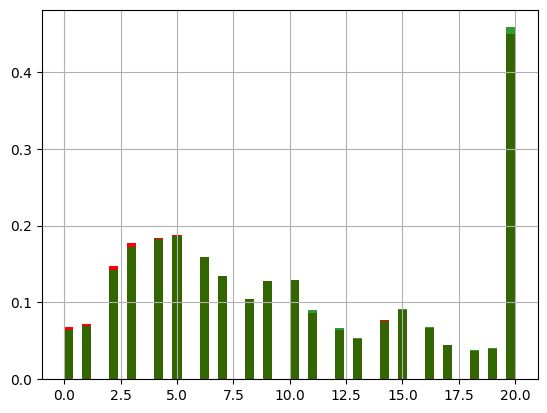

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['experience'].hist(bins=50, ax=ax, density=True, color='red')


new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

Plot PDF: Experience

<Axes: ylabel='Density'>

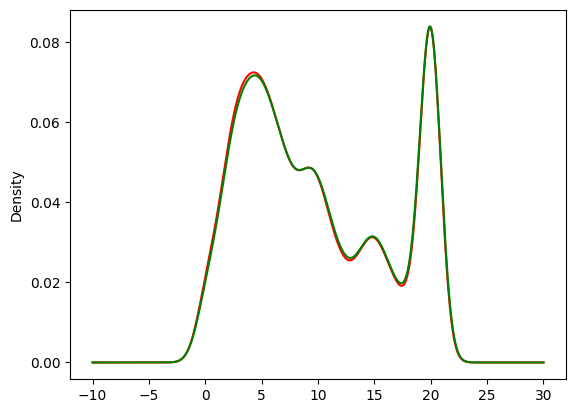

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['experience'].plot.density(color='red')

new_df['experience'].plot.density(color='green')

CCA in Categorical Data

In [54]:
df['education_level'].value_counts()

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


In [55]:
df['enrolled_university'].value_counts()

,count
enrolled_university,
no_enrollment,13817
Full time course,3757
Part time course,1198


CCA Apply in Enrolled University

In [56]:
temp = pd.concat([df['enrolled_university'].value_counts() / len(df), new_df['enrolled_university'].value_counts() / len(new_df)], axis=1)

temp.columns = ['original', 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
